In [130]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [131]:
iris = load_iris()
X = iris.data
y = iris.target

In [132]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [133]:
np.unique(y)

array([0, 1, 2])

In [134]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [135]:

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [136]:


# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [154]:
len(y_train), y_train


(100,
 tensor([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
         1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0,
         2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0,
         1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1,
         2, 0, 1, 2]))

In [138]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [139]:
model = Model()

In [140]:

# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [141]:
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.2351717948913574
Epoch: 10 and loss: 1.0494251251220703
Epoch: 20 and loss: 0.9453365802764893
Epoch: 30 and loss: 0.7897630333900452
Epoch: 40 and loss: 0.6583644151687622
Epoch: 50 and loss: 0.5202321410179138
Epoch: 60 and loss: 0.4011673033237457
Epoch: 70 and loss: 0.3099095821380615
Epoch: 80 and loss: 0.2246503084897995
Epoch: 90 and loss: 0.1551353633403778


Text(0.5, 0, 'Epoch')

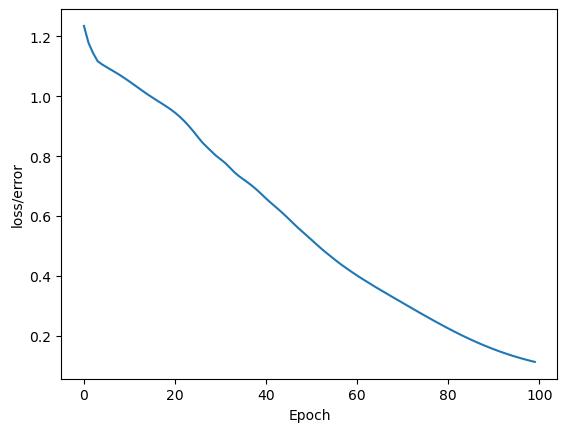

In [142]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [143]:

# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [144]:
loss

tensor(0.0889)

In [145]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-2.2377,  6.3852,  4.2089]) 	 1 	 1
2.)  tensor([ 4.8050, -3.0659, -2.3672]) 	 0 	 0
3.)  tensor([-5.3605,  6.9219, 12.9326]) 	 2 	 2
4.)  tensor([-2.3517,  6.1559,  4.6710]) 	 1 	 1
5.)  tensor([-2.5018,  6.8242,  4.7191]) 	 1 	 1
6.)  tensor([ 4.4141, -2.7194, -2.2162]) 	 0 	 0
7.)  tensor([-1.3933,  5.1273,  2.4930]) 	 1 	 1
8.)  tensor([-3.6455,  6.4161,  8.2636]) 	 2 	 2
9.)  tensor([-2.7493,  6.2083,  5.7912]) 	 1 	 1
10.)  tensor([-1.6258,  5.6445,  2.8669]) 	 1 	 1
11.)  tensor([-3.2715,  6.2855,  7.2569]) 	 2 	 2
12.)  tensor([ 4.3774, -2.6868, -2.2020]) 	 0 	 0
13.)  tensor([ 4.9891, -3.2290, -2.4384]) 	 0 	 0
14.)  tensor([ 4.4048, -2.7111, -2.2126]) 	 0 	 0
15.)  tensor([ 4.7613, -3.0271, -2.3504]) 	 0 	 0
16.)  tensor([-2.3903,  6.3902,  4.6474]) 	 1 	 1
17.)  tensor([-4.2754,  6.1082, 10.2637]) 	 2 	 2
18.)  tensor([-1.6325,  5.6593,  2.8776]) 	 1 	 1
19.)  tensor([-2.2042,  6.0167,  4.3250]) 	 1 	 1
20.)  tensor([-4.1980,  6.0088, 10.0973]) 	 2 	 2
21.)  ten

In [146]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])


In [147]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.4511, -2.7521, -2.2305])


In [148]:
accuracy_score(y_test, y_test_hat.indices)

0.94

In [149]:
from collections import Counter
most_common_cnt = Counter(y_test).most_common()[0][1]
print(f"Naive Classifier: {most_common_cnt / len(y_test) * 100} %")

Naive Classifier: 2.0 %
